In [1]:
import pandas as pd  
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 
import re 
titanic = pd.read_csv("titanic.csv")
print(titanic.head())
%matplotlib inline 

   row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket  boat     sex  
0                     St Louis, MO  B-5  24160 L221     2  female  
1  Montreal, PQ / Chesterville, ON  C26         NaN   NaN  female  
2  Montreal, PQ / Chesterville, ON  C26         NaN  -135    male  
3  Montreal, PQ / Chesterville, ON  C26         NaN   NaN  female  
4  M

In [2]:
titanic.iloc[0:3,:]  

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male


In [3]:
list(titanic.columns.values)   

['row.names',
 'pclass',
 'survived',
 'name',
 'age',
 'embarked',
 'home.dest',
 'room',
 'ticket',
 'boat',
 'sex']

In [4]:
titanic.describe() 

/Users/aratatomiyoshi/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,row.names,survived,age
count,1313.000000,1313.000000,633.000000
mean,657.000000,0.341965,31.194181
std,379.174762,0.474549,14.747525
min,1.000000,0.000000,0.166700
25%,329.000000,0.000000,NaN
50%,657.000000,0.000000,NaN
75%,985.000000,1.000000,NaN
max,1313.000000,1.000000,71.000000


In [5]:
titanic[titanic["pclass"] == "3rd"].mean() 

row.names    958.000000
survived       0.192686
age           24.519658
dtype: float64

In [6]:
titanic.shape  
print(titanic.head(10))

   row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   
5          6    1st         1   
6          7    1st         1   
7          8    1st         0   
8          9    1st         1   
9         10    1st         0   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   
5                               Anderson, Mr Harry  47.0000  Southampton   
6                 Andrews, Miss Kornelia Theodosia  63.0000  Southampton   
7                           

<head>Pclass<head>

In [7]:
survival_pclass_mean = titanic.pivot_table('survived', index="pclass",  aggfunc='mean') 
print(survival_pclass_mean)

pclass
1st    0.599379
2nd    0.425000
3rd    0.192686
Name: survived, dtype: float64


In [8]:
titanic.pivot_table('age', index='pclass', aggfunc='mean') 


pclass
1st    39.667773
2nd    28.300314
3rd    24.519658
Name: age, dtype: float64

In [9]:
titanic["survived"].value_counts(normalize=True) 
#Survival rate was 34% 

0    0.658035
1    0.341965
Name: survived, dtype: float64

/Users/aratatomiyoshi/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


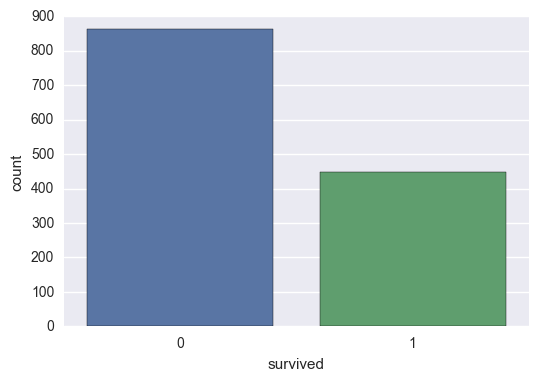

In [10]:
titanic["survived"].value_counts(normalize=True) 
sns.countplot(titanic["survived"]).legend()

In [11]:
titanic['pclass'][titanic['survived'] == 1].value_counts(normalize=True) 

1st    0.429844
3rd    0.305122
2nd    0.265033
Name: pclass, dtype: float64

In [12]:
titanic['pclass'][titanic['survived'] == 0].value_counts(normalize=True) 

3rd    0.664352
2nd    0.186343
1st    0.149306
Name: pclass, dtype: float64

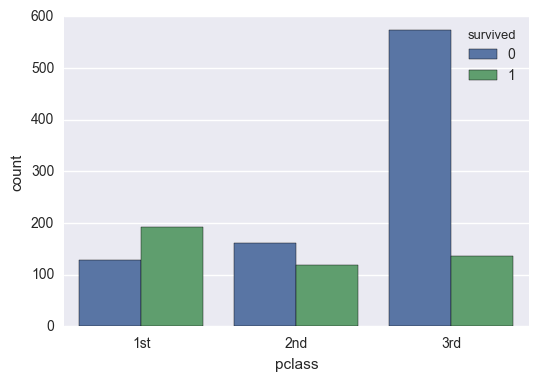

In [13]:
sns.countplot(titanic['pclass'], hue=titanic['survived'])
#It seems pretty obvious that passengers on cabin 3 more likely to die than alive. 
#Passengers on cabin 1 were more likely to survived. 

In [14]:
titanic['sex'].value_counts(normalize=True) 
#65% of passengers were male 

male      0.647372
female    0.352628
Name: sex, dtype: float64

In [15]:
titanic['survived'].groupby(titanic['sex']).mean()
#Female were more likely to be survived 

sex
female    0.663067
male      0.167059
Name: survived, dtype: float64

In [16]:
pd.isnull(titanic['survived']).value_counts()  
titanic['survived']

0       1
1       0
2       0
3       0
4       1
5       1
6       1
7       0
8       1
9       0
10      0
11      1
12      1
13      1
14      0
15      1
16      0
17      0
18      1
19      1
20      1
21      0
22      1
23      1
24      1
25      0
26      1
27      1
28      1
29      0
       ..
1283    0
1284    0
1285    0
1286    0
1287    0
1288    0
1289    1
1290    0
1291    0
1292    0
1293    1
1294    0
1295    0
1296    0
1297    0
1298    0
1299    0
1300    0
1301    0
1302    1
1303    0
1304    1
1305    0
1306    0
1307    0
1308    0
1309    0
1310    0
1311    0
1312    0
Name: survived, dtype: int64

In [17]:
titanic[titanic['age'] < 20].count()

row.names    128
pclass       128
survived     128
name         128
age          128
embarked     128
home.dest    124
room           7
ticket        15
boat          56
sex          128
dtype: int64

<head>Age<head>

In [18]:
titanic['survived'].groupby(pd.qcut(titanic['age'],5)).mean() 
#pd.qcut will devide a list of values equally  
#Age less than 19 were more likely to be survived  


age
[0.167, 19]    0.578125
(19, 26]       0.354610
(26, 33]       0.400000
(33, 45]       0.447761
(45, 71]       0.443478
Name: survived, dtype: float64

In [19]:
pd.qcut(titanic['age'],5).value_counts() 
#Age19-26 had a highest number of passenger  

(19, 26]       141
(33, 45]       134
[0.167, 19]    128
(45, 71]       115
(26, 33]       115
Name: age, dtype: int64

<head>Embarked<head>

In [20]:
titanic['embarked'].value_counts(normalize=True) 

Southampton    0.697929
Cherbourg      0.247259
Queenstown     0.054811
Name: embarked, dtype: float64

In [21]:
titanic['survived'].groupby(titanic['embarked']).mean()

embarked
Cherbourg      0.586207
Queenstown     0.311111
Southampton    0.399651
Name: survived, dtype: float64

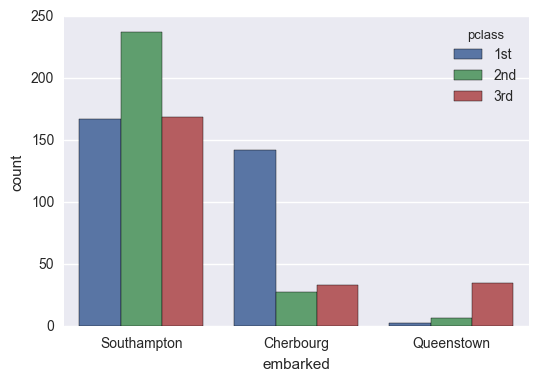

In [22]:
sns.countplot(titanic['embarked'], hue=titanic['pclass'])
#Majority of passengers from Cherbourg were 1st class passengers 
#Southampton had 2nd class passengers the most in the group  
#Majority of passengers onborded from Queenstown were 3rd class passengers 

In [23]:
titanic[titanic['embarked'] == 'Cherbourg']['survived'].value_counts()

1    119
0     84
Name: survived, dtype: int64

In [24]:
titanic[titanic['embarked'] == 'Southampton']['survived'].value_counts(normalize=True)

0    0.600349
1    0.399651
Name: survived, dtype: float64

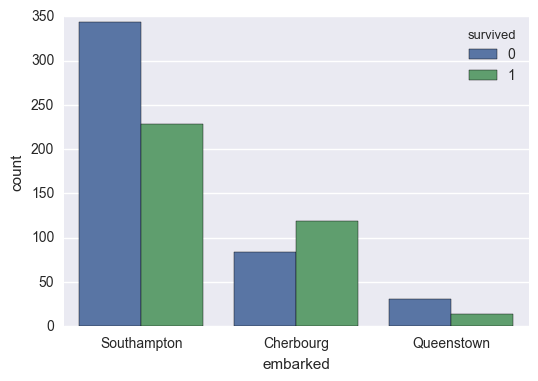

In [25]:
sns.countplot(titanic['embarked'], hue=titanic['survived']) 

The reason passengers from Cherbourg had higher survival rate was that majority of the passenger were 1st class passenger( among all survival passengers based on pclass, 43% of the passengers were 1st class passengers). Therefore, we can conclude that there is a regional inequality affecting a survival rate.  

In [26]:
titanic[titanic['embarked'] == 'Cherbourg'][titanic['sex'] == 'female'].mean() 


/Users/aratatomiyoshi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


row.names    274.010204
survived       0.887755
age           34.109375
dtype: float64

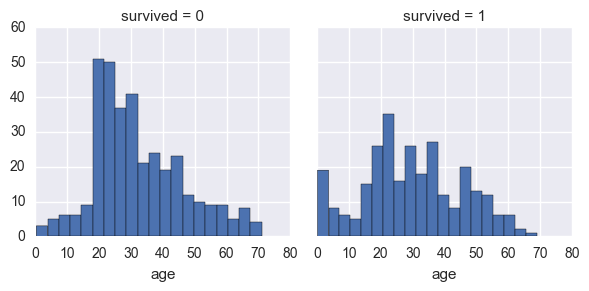

In [27]:
g = sns.FacetGrid(titanic, col="survived") 
g.map(plt.hist, 'age', bins=20)

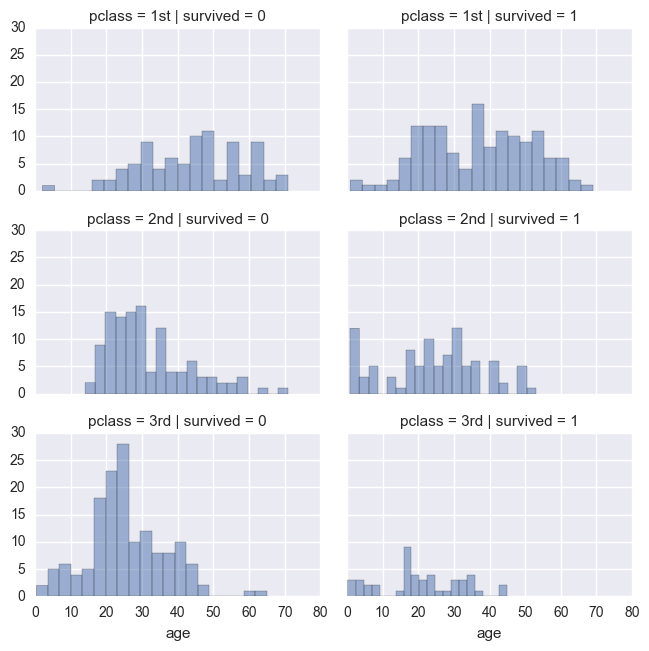

In [28]:
g = sns.FacetGrid(titanic, col="survived", row="pclass", size=2.2, aspect=1.5)
g.map(plt.hist,'age', bins=20, alpha=.5)
#aspect changes the width of the bar 
#alpha changes the transparacy of the bar color, so that you can see the grid 

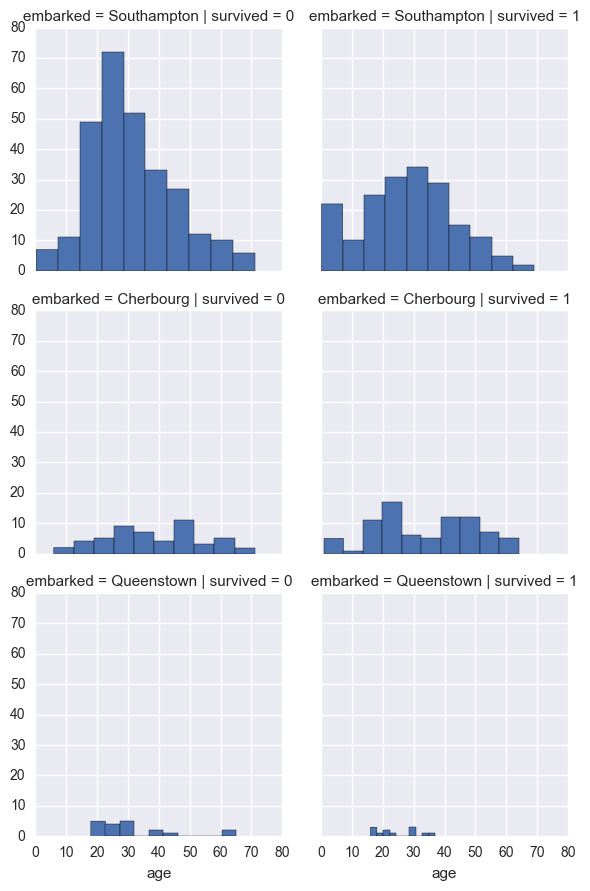

In [29]:
g = sns.FacetGrid(titanic, col="survived", row="embarked")
g.map(plt.hist, "age")

In [30]:
titanic["sex_int"] = titanic["sex"].map({"male":0,"female":1}).astype(int)
print(titanic["sex_int"])

0       1
1       1
2       0
3       1
4       0
5       0
6       1
7       0
8       1
9       0
10      0
11      1
12      1
13      0
14      0
15      1
16      0
17      0
18      0
19      1
20      0
21      0
22      0
23      1
24      0
25      0
26      0
27      1
28      1
29      0
       ..
1283    1
1284    0
1285    0
1286    0
1287    0
1288    0
1289    0
1290    0
1291    0
1292    0
1293    1
1294    0
1295    0
1296    0
1297    0
1298    0
1299    0
1300    0
1301    0
1302    0
1303    0
1304    1
1305    0
1306    1
1307    1
1308    0
1309    0
1310    0
1311    1
1312    0
Name: sex_int, dtype: int64


In [31]:
print(titanic.groupby(["survived","sex"]).mean())
titanic.groupby("survived", axis=0).mean()

                  row.names        age  sex_int
survived sex                                   
0        female  887.685897  26.545455      1.0
         male    724.772599  33.062770      0.0
1        female  445.117264  31.463149      1.0
         male    523.746479  26.017276      0.0


,row.names,age,sex_int
survived,,,
0,754.18750,32.248106,0.180556
1,469.98441,29.873962,0.683742


In [32]:
titanic["name"]

0                           Allen, Miss Elisabeth Walton
1                            Allison, Miss Helen Loraine
2                    Allison, Mr Hudson Joshua Creighton
3        Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)
4                          Allison, Master Hudson Trevor
5                                     Anderson, Mr Harry
6                       Andrews, Miss Kornelia Theodosia
7                                 Andrews, Mr Thomas, jr
8           Appleton, Mrs Edward Dale (Charlotte Lamson)
9                                 Artagaveytia, Mr Ramon
10                             Astor, Colonel John Jacob
11      Astor, Mrs John Jacob (Madeleine Talmadge Force)
12                          Aubert, Mrs Leontine Pauline
13                             Barkworth, Mr Algernon H.
14                                   Baumann, Mr John D.
15        Baxter, Mrs James (Helene DeLaudeniere Chaput)
16                               Baxter, Mr Quigg Edmond
17                             

In [33]:
import re 
count_mr = 0 
count_miss = 0 
count_mrs = 0 
count_master = 0 

for names in titanic["name"]: 
    if re.search("Mr", names) is not None: 
        count_mr += 1 
    elif re.search("Miss", names) is not None: 
        count_miss += 1 
    elif re.search("M.s", names) is not None: 
        count_mrs += 1 
    elif re.search("Master", names) is not None: 
        count_master += 1 
print(count_mr)
print(count_miss)
print(count_mrs) 
print(count_master)


950
236
61
0


In [34]:
if re.search("Ar.", "Arata") is not None: 
    print("Found")

if re.search("A.a", "Arata") is not None: 
    print("Found")

Found
Found


In [45]:
sex = titanic["sex"] 
sex_is_null = pd.isnull(sex)
sex_null_true = sex[sex_is_null]
print(len(sex_null_true)) 

0


In [48]:
def nul_values(value):
    value_is_null = pd.isnull(value)
    value_null_true = value[value_is_null]
    return len(value_null_true) 

sex_null_counts = nul_values(titanic["sex"])
print(sex_null_counts)

ticket_null_counts = nul_values(titanic["ticket"])
print(ticket_null_counts)
    

0
1244


In [51]:
ticket = titanic["ticket"]
ticket_null_value = pd.isnull(ticket)
print(ticket_null_value)
ticket_is_null = ticket[ticket_null_value]
print(len(ticket_is_null))

0       False
1        True
2        True
3        True
4        True
5        True
6       False
7        True
8        True
9        True
10      False
11      False
12      False
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24      False
25       True
26       True
27       True
28       True
29       True
        ...  
1283     True
1284     True
1285     True
1286     True
1287     True
1288     True
1289     True
1290     True
1291     True
1292     True
1293     True
1294     True
1295     True
1296     True
1297     True
1298     True
1299     True
1300     True
1301     True
1302     True
1303     True
1304     True
1305     True
1306     True
1307     True
1308     True
1309     True
1310     True
1311     True
1312     True
Name: ticket, dtype: bool
1244
